In [2]:
import pandas as pd
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"Downloads/rainfall in india 1901-2015.csv")

In [4]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
data.shape

(4116, 19)

In [6]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4112 non-null float64
FEB            4113 non-null float64
MAR            4110 non-null float64
APR            4112 non-null float64
MAY            4113 non-null float64
JUN            4111 non-null float64
JUL            4109 non-null float64
AUG            4112 non-null float64
SEP            4110 non-null float64
OCT            4109 non-null float64
NOV            4105 non-null float64
DEC            4106 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4110 non-null float64
Mar-May        4107 non-null float64
Jun-Sep        4106 non-null float64
Oct-Dec        4103 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB


In [8]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [9]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [10]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [11]:
data=data.drop(['ANNUAL','Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec'],axis=1)

In [12]:
data.groupby('SUBDIVISION').count()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
SUBDIVISION,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,110,110,110,108,108,109,108,108,108,107,108,108,107
ARUNACHAL PRADESH,97,96,96,95,97,97,96,96,97,97,95,95,95
ASSAM & MEGHALAYA,115,115,115,115,115,115,115,115,115,115,115,115,115
BIHAR,115,115,115,115,115,115,115,115,115,115,115,115,115
CHHATTISGARH,115,115,115,115,115,115,115,115,115,115,115,115,115
COASTAL ANDHRA PRADESH,115,115,115,115,115,115,115,115,115,115,115,115,115
COASTAL KARNATAKA,115,114,115,115,115,115,115,115,115,115,115,115,115
EAST MADHYA PRADESH,115,115,115,115,115,115,115,115,115,115,115,115,115
EAST RAJASTHAN,115,115,115,115,115,115,115,115,115,115,115,115,115


In [13]:
data['SUBDIVISION'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [14]:
data1=data.loc[(data['SUBDIVISION']=='ANDAMAN & NICOBAR ISLANDS')]

In [15]:
data1.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            2
APR            2
MAY            1
JUN            2
JUL            2
AUG            2
SEP            3
OCT            2
NOV            2
DEC            3
dtype: int64

In [16]:
data1['DEC'].fillna(data1['DEC'].mean(),inplace=True)
data1['NOV'].fillna(data1['NOV'].mean(),inplace=True)
data1['OCT'].fillna(data1['OCT'].mean(),inplace=True)
data1['SEP'].fillna(data1['SEP'].mean(),inplace=True)
data1['AUG'].fillna(data1['AUG'].mean(),inplace=True)
data1['JUL'].fillna(data1['JUL'].mean(),inplace=True)
data1['JUN'].fillna(data1['JUN'].mean(),inplace=True)
data1['MAY'].fillna(data1['MAY'].mean(),inplace=True)
data1['APR'].fillna(data1['APR'].mean(),inplace=True)
data1['MAR'].fillna(data1['MAR'].mean(),inplace=True)

In [17]:
data2=data.loc[(data['SUBDIVISION']=='ARUNACHAL PRADESH')]

In [18]:
data2.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            1
FEB            1
MAR            2
APR            0
MAY            0
JUN            1
JUL            1
AUG            0
SEP            0
OCT            2
NOV            2
DEC            2
dtype: int64

In [19]:
data2['DEC'].fillna(data2['DEC'].mean(),inplace=True)
data2['NOV'].fillna(data2['NOV'].mean(),inplace=True)
data2['OCT'].fillna(data2['OCT'].mean(),inplace=True)
data2['JUL'].fillna(data2['JUL'].mean(),inplace=True)
data2['JUN'].fillna(data2['JUN'].mean(),inplace=True)
data2['MAR'].fillna(data2['MAR'].mean(),inplace=True)
data2['FEB'].fillna(data2['FEB'].mean(),inplace=True)
data2['JAN'].fillna(data2['JAN'].mean(),inplace=True)

In [20]:
data3=data.loc[(data['SUBDIVISION']=='JAMMU & KASHMIR')]

In [21]:
data3.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            1
AUG            0
SEP            0
OCT            0
NOV            1
DEC            1
dtype: int64

In [22]:
data3['JUL'].fillna(data3['JUL'].mean(),inplace=True)
data3['DEC'].fillna(data3['DEC'].mean(),inplace=True)
data3['NOV'].fillna(data3['NOV'].mean(),inplace=True)

In [23]:
data4=data.loc[(data['SUBDIVISION']=='LAKSHADWEEP')]

In [24]:
data4.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            2
FEB            1
MAR            2
APR            2
MAY            2
JUN            2
JUL            3
AUG            2
SEP            3
OCT            3
NOV            6
DEC            4
dtype: int64

In [25]:
data4['DEC'].fillna(data4['DEC'].mean(),inplace=True)
data4['NOV'].fillna(data4['NOV'].mean(),inplace=True)
data4['OCT'].fillna(data4['OCT'].mean(),inplace=True)
data4['SEP'].fillna(data4['SEP'].mean(),inplace=True)
data4['AUG'].fillna(data4['AUG'].mean(),inplace=True)
data4['JUL'].fillna(data4['JUL'].mean(),inplace=True)
data4['JUN'].fillna(data4['JUN'].mean(),inplace=True)
data4['MAY'].fillna(data4['MAY'].mean(),inplace=True)
data4['APR'].fillna(data4['APR'].mean(),inplace=True)
data4['MAR'].fillna(data4['MAR'].mean(),inplace=True)
data4['FEB'].fillna(data4['FEB'].mean(),inplace=True)
data4['JAN'].fillna(data4['JAN'].mean(),inplace=True)

In [26]:
data5=data.loc[(data['SUBDIVISION']=='WEST MADHYA PRADESH')]

In [27]:
data5.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            1
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
dtype: int64

In [28]:
data5['FEB'].fillna(data5['FEB'].mean(),inplace=True)

In [29]:
data6=data.loc[(data['SUBDIVISION']=='COASTAL KARNATAKA')]

In [30]:
data6.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            1
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
dtype: int64

In [31]:
data6['JAN'].fillna(data6['JAN'].mean(),inplace=True)

In [32]:
data7=data.loc[(data['SUBDIVISION']=='KERALA')]

In [86]:
data7['ANNUAL']=data7[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)
data7.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JJAS,OND
3887,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,2122.8,666.1
3888,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.5,2403.3,638.2
3889,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.4,2343.1,570.1
3890,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.6,2398.2,365.3
3891,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.7,1881.5,458.1


In [34]:
data7['JJAS']=data7[['JUN', 'JUL','AUG', 'SEP']].sum(axis=1)
data7['OND']=data7[['OCT', 'NOV', 'DEC']].sum(axis=1)

In [35]:
data7.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JJAS,OND
3887,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,2122.8,666.1
3888,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.5,2403.3,638.2
3889,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.4,2343.1,570.1
3890,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.6,2398.2,365.3
3891,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.7,1881.5,458.1


In [36]:
data_new=data7.drop(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],axis=1)

In [37]:
data_new.head()

,SUBDIVISION,YEAR,ANNUAL,JJAS,OND
3887,KERALA,1901,3248.6,2122.8,666.1
3888,KERALA,1902,3326.5,2403.3,638.2
3889,KERALA,1903,3271.4,2343.1,570.1
3890,KERALA,1904,3129.6,2398.2,365.3
3891,KERALA,1905,2741.7,1881.5,458.1


In [38]:
data_new.to_csv('kerala.csv')

In [39]:
data=data.loc[(data['SUBDIVISION']!='ANDAMAN & NICOBAR ISLANDS')]
data=data.loc[(data['SUBDIVISION']!='ARUNACHAL PRADESH')]
data=data.loc[(data['SUBDIVISION']!='JAMMU & KASHMIR')]
data=data.loc[(data['SUBDIVISION']!='LAKSHADWEEP')]
data=data.loc[(data['SUBDIVISION']!='WEST MADHYA PRADESH')]
data=data.loc[(data['SUBDIVISION']!='COASTAL KARNATAKA')]

In [40]:
data['SUBDIVISION'].unique()

array(['ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'WEST RAJASTHAN', 'EAST RAJASTHAN',
       'EAST MADHYA PRADESH', 'GUJARAT REGION', 'SAURASHTRA & KUTCH',
       'KONKAN & GOA', 'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA',
       'CHHATTISGARH', 'COASTAL ANDHRA PRADESH', 'TELANGANA',
       'RAYALSEEMA', 'TAMIL NADU', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA'], dtype=object)

In [41]:
data_new_1=pd.concat([data1,data2,data3,data4,data5,data6],ignore_index=True)

In [42]:
data_new_1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [43]:
#data_new_1['ANNUAL']=data_new_1[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
#       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)

In [44]:
#data_new_1['JJAS']=data_new_1[['JUN', 'JUL',
#       'AUG', 'SEP']].sum(axis=1)

In [45]:
#data_new_1['OND']=data_new_1[['OCT', 'NOV', 'DEC']].sum(axis=1)

In [46]:
data_new_1.groupby('SUBDIVISION').count()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
SUBDIVISION,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,110,110,110,110,110,110,110,110,110,110,110,110,110
ARUNACHAL PRADESH,97,97,97,97,97,97,97,97,97,97,97,97,97
COASTAL KARNATAKA,115,115,115,115,115,115,115,115,115,115,115,115,115
JAMMU & KASHMIR,115,115,115,115,115,115,115,115,115,115,115,115,115
LAKSHADWEEP,114,114,114,114,114,114,114,114,114,114,114,114,114
WEST MADHYA PRADESH,115,115,115,115,115,115,115,115,115,115,115,115,115


In [47]:
data_new_1.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
dtype: int64

In [48]:
df_merge=pd.concat([data,data_new_1],ignore_index=True)

In [49]:
df_merge.shape

(4116, 14)

In [50]:
df_merge.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
dtype: int64

In [51]:
df_merge['ANNUAL']=df_merge[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)

In [52]:
df_merge['JJAS']=df_merge[[ 'JUN', 'JUL',
       'AUG', 'SEP']].sum(axis=1)
df_merge['OND']=df_merge[[ 'OCT', 'NOV', 'DEC']].sum(axis=1)

In [53]:
df_merge.to_csv('rainfall_data_cleaned.csv')

In [54]:
df=df_merge.loc[(df_merge['SUBDIVISION']=='KERALA')]

In [55]:
df['ANNUAL']=df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)

In [56]:
df['JJAS']=df[[ 'JUN', 'JUL',
       'AUG', 'SEP']].sum(axis=1)
df['OND']=df[[ 'OCT', 'NOV', 'DEC']].sum(axis=1)
df=df[['ANNUAL','JJAS','OND']]

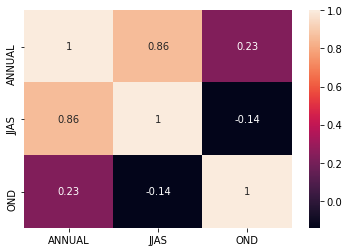

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)

In [58]:
df.to_csv('tamilnadu.csv')

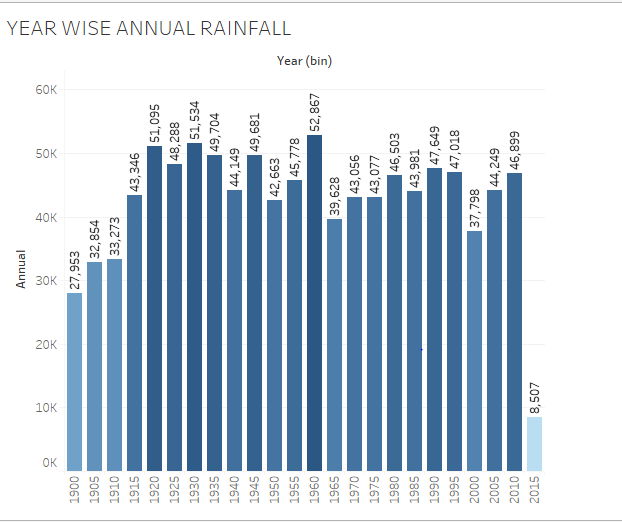

In [59]:
df1=data.loc[(data['SUBDIVISION']=='WEST RAJASTHAN')]
df1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1817,WEST RAJASTHAN,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6
1818,WEST RAJASTHAN,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0
1819,WEST RAJASTHAN,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5
1820,WEST RAJASTHAN,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1
1821,WEST RAJASTHAN,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9


In [60]:
df2=data.loc[(data['SUBDIVISION']=='KERALA')]
df2.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3887,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
3888,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
3889,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3890,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
3891,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [61]:
df3=data.loc[(data['SUBDIVISION']=='TAMIL NADU')]
df3.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1
3431,TAMIL NADU,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2


In [81]:
rkt=pd.concat([df1,df2,df3],ignore_index=True)

In [63]:
rkt.to_csv('rkt.csv')

In [64]:
rkt.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
dtype: int64

In [65]:
rkt.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,WEST RAJASTHAN,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6
1,WEST RAJASTHAN,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0
2,WEST RAJASTHAN,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5
3,WEST RAJASTHAN,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1
4,WEST RAJASTHAN,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9


In [66]:
rkt['ANNUAL']=rkt[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)

In [67]:
rkt.to_csv('rkt.csv')

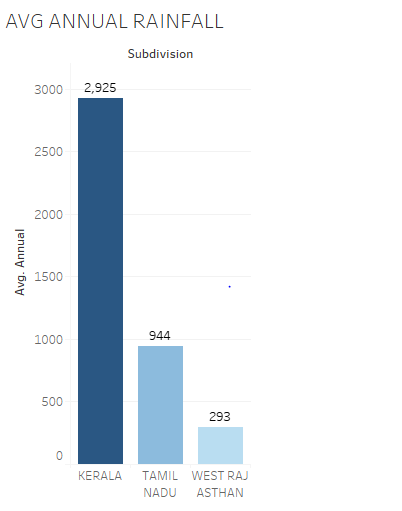

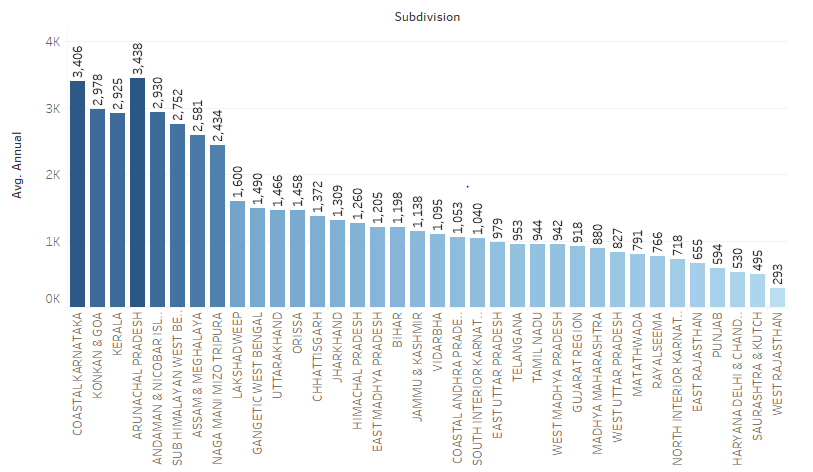

In [68]:
df_merge.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JJAS,OND
0,ASSAM & MEGHALAYA,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2,2498.7,1711.0,280.5
1,ASSAM & MEGHALAYA,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3,2952.1,2108.8,106.1
2,ASSAM & MEGHALAYA,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3,2544.6,1828.4,220.1
3,ASSAM & MEGHALAYA,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5,2664.2,1548.0,164.8
4,ASSAM & MEGHALAYA,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8,2790.7,1885.9,241.6


In [69]:
subdivision_dict={'ANDAMAN & NICOBAR ISLANDS':0, 'ARUNACHAL PRADESH':1,
       'ASSAM & MEGHALAYA':2, 'NAGA MANI MIZO TRIPURA':3,
       'SUB HIMALAYAN WEST BENGAL & SIKKIM':4, 'GANGETIC WEST BENGAL':5,
       'ORISSA':6, 'JHARKHAND':7, 'BIHAR':8, 'EAST UTTAR PRADESH':9,
       'WEST UTTAR PRADESH':10, 'UTTARAKHAND':11, 'HARYANA DELHI & CHANDIGARH':12,
       'PUNJAB':13, 'HIMACHAL PRADESH':14, 'JAMMU & KASHMIR':15, 'WEST RAJASTHAN':16,
       'EAST RAJASTHAN':17, 'WEST MADHYA PRADESH':18, 'EAST MADHYA PRADESH':19,
       'GUJARAT REGION':20, 'SAURASHTRA & KUTCH':21, 'KONKAN & GOA':22,
       'MADHYA MAHARASHTRA':23, 'MATATHWADA':24, 'VIDARBHA':25, 'CHHATTISGARH':26,
       'COASTAL ANDHRA PRADESH':27, 'TELANGANA':28, 'RAYALSEEMA':29, 'TAMIL NADU':30,
       'COASTAL KARNATAKA':31, 'NORTH INTERIOR KARNATAKA':32,
       'SOUTH INTERIOR KARNATAKA':33, 'KERALA':34, 'LAKSHADWEEP':35}
df_merge['SUBDIVISION']=df_merge['SUBDIVISION'].map(subdivision_dict)

In [70]:
x=df_merge[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y=df_merge['ANNUAL']

In [71]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.35,random_state=42)

In [72]:
xtrain.shape

(2675, 13)

In [73]:
xtrain.head()

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2721,27,1.5,0.0,1.2,62.5,102.4,112.5,149.7,176.8,112.3,121.0,289.9,3.0
1726,19,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1
1578,16,0.1,2.8,0.1,1.1,0.0,8.7,50.4,85.3,54.5,0.1,0.2,0.0
855,9,27.4,10.9,21.6,6.1,2.5,114.4,139.2,247.4,168.3,12.7,2.0,0.1
1729,19,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6


In [74]:
ytrain.shape

(2675,)

In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [76]:
ypred=lr.predict(xtest)
ypred

array([1316.1, 1374.1,  546. , ..., 1011.7, 1491.7,  922.2])

In [77]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

1.0

In [78]:
Results= pd.DataFrame(columns=['Price','Predicted'])
Results['Price']=ytest
Results['Predicted']=ypred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(5)

,index,Price,Predicted,Id
0,2647,1316.1,1316.1,0
1,842,1374.1,1374.1,1
2,2351,546.0,546.0,2
3,751,1178.0,1178.0,3
4,3626,3266.4,3266.4,4


In [82]:
file = open("model.pkl","wb")
pickle.dump(lr,file)
file.close()